In [1]:
import xtrack as xt
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_collider = "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/all_optics_2024_reverted/collider_00/xtrack_0000/collider.json"

# This notebook assumes that the collider loaded embeds a configuration
with open(path_collider, "r") as fid:
    collider_dict = json.load(fid)
if "config_yaml" in collider_dict:
    print("A configuration has been found in the collider file. Using it.")
    config_BB = collider_dict["config_yaml"]["config_beambeam"]
else:
    raise ValueError("No configuration found in collider file.")

collider = xt.Multiline.from_dict(collider_dict)
collider.build_trackers()

A configuration has been found in the collider file. Using it.
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.


Beam-beam off, octupoles off

Compiling ContextCpu kernels...


ab43c1e5581a4660a956f44be6caf3d5.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from ab43c1e5581a4660a956f44be6caf3d5.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


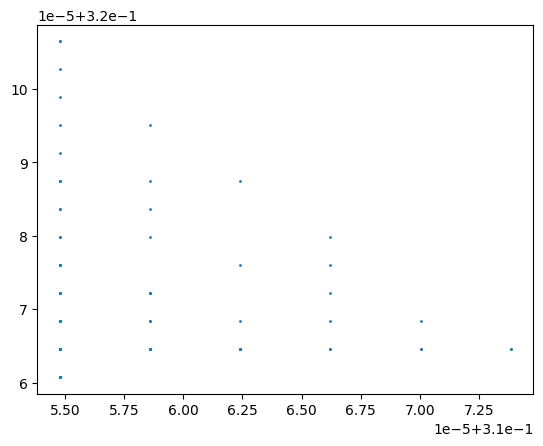

In [3]:
with xt._temp_knobs(collider.lhcb1,{"beambeam_scale": 0, 'i_oct_b1' : 0},):
    fp_polar_xm = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns = 2000,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal = True
    )

qx = fp_polar_xm.qx.flatten()
qy = fp_polar_xm.qy.flatten()
to_keep = np.abs(qx-qy) > 1e-4
qx = qx[to_keep]
qy = qy[to_keep]

plt.scatter(qx, qy, s=1)
plt.xlim(0.305, 0.315)
plt.ylim(0.315, 0.325)
plt.show()
    

Beam-beam off, octupoles on

Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


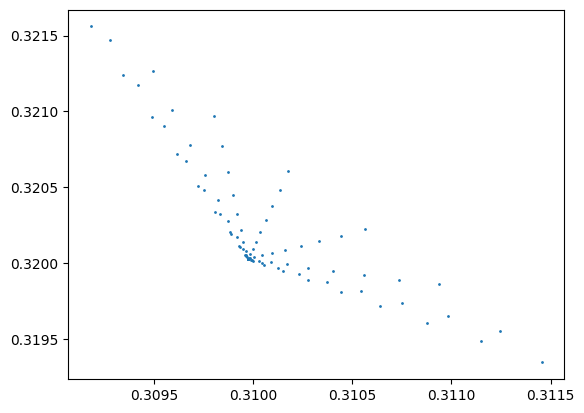

In [4]:
with xt._temp_knobs(collider.lhcb1,{"beambeam_scale": 0, 'i_oct_b1' : 300},):
    fp_polar_xm = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns = 2000,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal = True
    )

qx = fp_polar_xm.qx.flatten()
qy = fp_polar_xm.qy.flatten()
to_keep = np.abs(qx-qy) > 1e-4
qx = qx[to_keep]
qy = qy[to_keep]
plt.scatter(qx, qy, s=1)
plt.xlim(0.305, 0.315)
plt.ylim(0.315, 0.325)
plt.show()


Octupoles off, and only HO

In [5]:
def return_knobs_BB(collider, HO = True, n_LR = 0):
    l_knobs = []
    for ip in [1,2,5,8]:
        l_HO = [f'bb_ho.c{ip}', f'bb_ho.l{ip}' ,f'bb_ho.r{ip}'] if HO else []
        for var in collider.vars.keys():
            for name_knob in [f'bb_lr.l{ip}', f'bb_lr.r{ip}'] + l_HO:
                if name_knob in var and 'scale_strength' in var:
                    if 'bb_lr.' in var:
                        if int(var.split("_scale")[0][-2:]) <= n_LR:
                            l_knobs.append(var)
                    elif 'bb_ho.' in var:
                        l_knobs.append(var)
    return l_knobs

## This notebookd doesn't work yet, as changing the individual bb strengths break beambeam_scale

Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


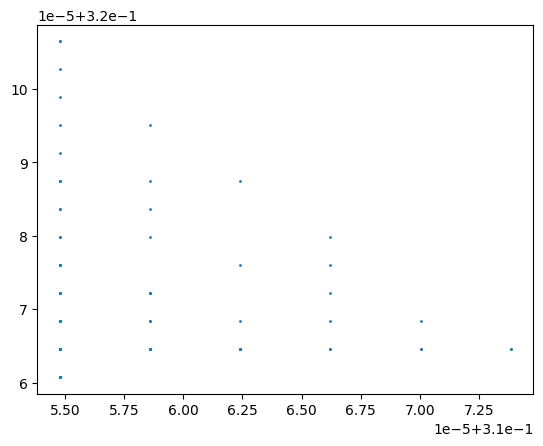

In [6]:
dic_knobs = {x:0 for x in return_knobs_BB(collider, HO = True, n_LR = 0)}
with xt._temp_knobs(collider.lhcb1,{"beambeam_scale": 0, 'i_oct_b1' : 0}|dic_knobs, ):
    fp_polar_xm = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns = 2000,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal = True
    )

qx = fp_polar_xm.qx.flatten()
qy = fp_polar_xm.qy.flatten()
to_keep = np.abs(qx-qy) > 1e-4
qx = qx[to_keep]
qy = qy[to_keep]
plt.scatter(qx, qy, s=1)
plt.xlim(0.305, 0.315)
plt.ylim(0.315, 0.325)
plt.show()



Octupoles off, but HO and progressively increase number of LR

Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


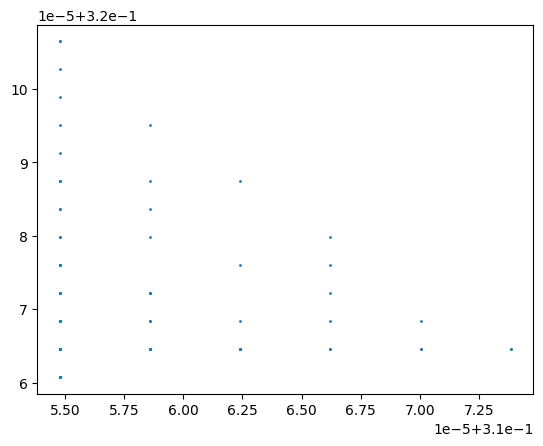

In [7]:
dic_knobs = {x:0 for x in return_knobs_BB(collider, HO = True, n_LR = 1)}
with xt._temp_knobs(collider.lhcb1,{"beambeam_scale": 0, 'i_oct_b1' : 0}|dic_knobs, ):
    fp_polar_xm = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns = 2000,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal = True
    )

qx = fp_polar_xm.qx.flatten()
qy = fp_polar_xm.qy.flatten()
to_keep = np.abs(qx-qy) > 1e-4
qx = qx[to_keep]
qy = qy[to_keep]
plt.scatter(qx, qy, s=1)
plt.xlim(0.305, 0.315)
plt.ylim(0.315, 0.325)
plt.show()

Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


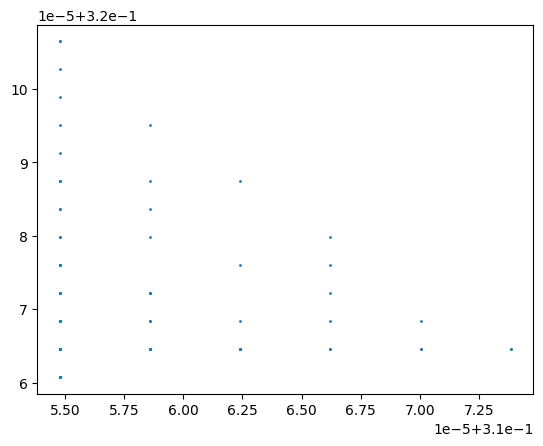

In [8]:
dic_knobs = {x:0 for x in return_knobs_BB(collider, HO = True, n_LR = 2)}
with xt._temp_knobs(collider.lhcb1,{"beambeam_scale": 0, 'i_oct_b1' : 0}|dic_knobs, ):
    fp_polar_xm = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns = 2000,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal = True
    )

qx = fp_polar_xm.qx.flatten()
qy = fp_polar_xm.qy.flatten()
to_keep = np.abs(qx-qy) > 1e-4
qx = qx[to_keep]
qy = qy[to_keep]
plt.scatter(qx, qy, s=1)
plt.xlim(0.305, 0.315)
plt.ylim(0.315, 0.325)
plt.show()

Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


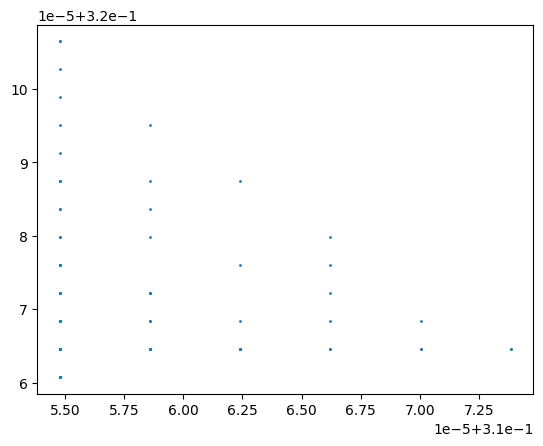

In [9]:
dic_knobs = {x:0 for x in return_knobs_BB(collider, HO = True, n_LR = 4)}
with xt._temp_knobs(collider.lhcb1,{"beambeam_scale": 0, 'i_oct_b1' : 0}|dic_knobs, ):
    fp_polar_xm = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns = 2000,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal = True
    )

qx = fp_polar_xm.qx.flatten()
qy = fp_polar_xm.qy.flatten()
to_keep = np.abs(qx-qy) > 1e-4
qx = qx[to_keep]
qy = qy[to_keep]
plt.scatter(qx, qy, s=1)
plt.xlim(0.305, 0.315)
plt.ylim(0.315, 0.325)
plt.show()

Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


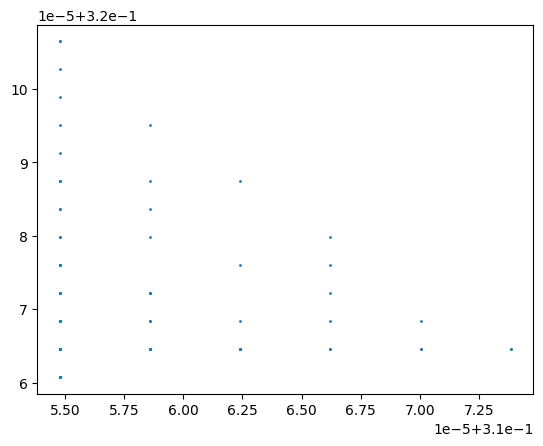

In [10]:
dic_knobs = {x:0 for x in return_knobs_BB(collider, HO = True, n_LR = 10)}
with xt._temp_knobs(collider.lhcb1,{"beambeam_scale": 0, 'i_oct_b1' : 0}|dic_knobs, ):
    fp_polar_xm = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns = 2000,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal = True
    )

qx = fp_polar_xm.qx.flatten()
qy = fp_polar_xm.qy.flatten()
to_keep = np.abs(qx-qy) > 1e-4
qx = qx[to_keep]
qy = qy[to_keep]
plt.scatter(qx, qy, s=1)
plt.xlim(0.305, 0.315)
plt.ylim(0.315, 0.325)
plt.show()

Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


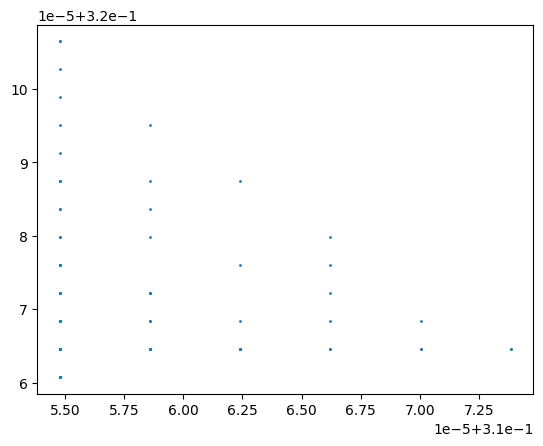

In [11]:
dic_knobs = {x:0 for x in return_knobs_BB(collider, HO = True, n_LR = 20)}
with xt._temp_knobs(collider.lhcb1,{"beambeam_scale": 0, 'i_oct_b1' : 0}|dic_knobs, ):
    fp_polar_xm = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns = 2000,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal = True
    )

qx = fp_polar_xm.qx.flatten()
qy = fp_polar_xm.qy.flatten()
to_keep = np.abs(qx-qy) > 1e-4
qx = qx[to_keep]
qy = qy[to_keep]
plt.scatter(qx, qy, s=1)
plt.xlim(0.305, 0.315)
plt.ylim(0.315, 0.325)
plt.show()

All on

Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


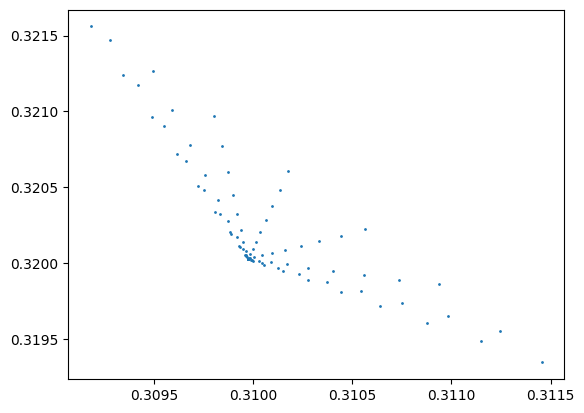

In [12]:
dic_knobs = {x:0 for x in return_knobs_BB(collider, HO = True, n_LR = 26)}
with xt._temp_knobs(collider.lhcb1,{"beambeam_scale": 1, 'i_oct_b1' : 300}|dic_knobs, ):
    fp_polar_xm = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns = 2000,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal = True
    )

qx = fp_polar_xm.qx.flatten()
qy = fp_polar_xm.qy.flatten()
to_keep = np.abs(qx-qy) > 1e-4
qx = qx[to_keep]
qy = qy[to_keep]
plt.scatter(qx, qy, s=1)
plt.xlim(0.305, 0.315)
plt.ylim(0.315, 0.325)
plt.show()